In [1]:
# Importing modules

import sys,os, gzip
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
for axticks in ['xtick','ytick']:
    plt.rcParams['{:}.direction'.format(axticks)] = 'in'
    plt.rcParams['{:}.minor.visible'.format(axticks)] = True

from sklearn.neighbors import KernelDensity


# Generate some test data

(15000,)


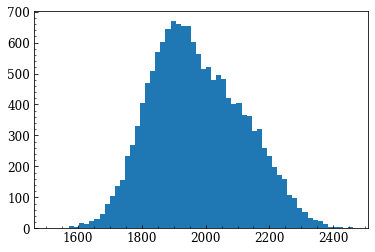

In [15]:
np.random.seed(42)
x = np.append(np.random.normal(1900, 100, size=10000),
              np.random.normal(2120, 100, size=5000))
print(x.shape)

fig,ax = plt.subplots()

_ = ax.hist(x, bins=60)

# Calculate the FWHM using KDE

In [3]:
from importlib import reload
from fwhm_from_kde import fwhm_from_kde

#a = fwhm_from_kde.fwhm_from_kde(x)
kde_peak,hwhm_peak_kde_upp,hwhm_peak_kde_low, kde_xy = fwhm_from_kde(x, show=False)

KDE estimation with kde kernel = 15.919
KDE scores
KDE peak = 1912.9670967011107 658.9951345964021


1912.967 +241.195, -125.421


# Plot the result

1912.967 +241.195, -125.421


Text(0, 0.5, 'N')

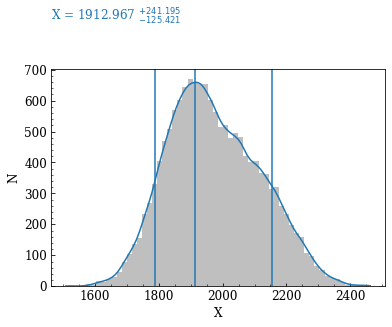

In [4]:
print('{:.3f} +{:.3f}, -{:.3f}'.format(kde_peak,hwhm_peak_kde_upp,hwhm_peak_kde_low))
dim_par_lab = r'X = {:.3f} $^{{+{:.3f}}}_{{-{:.3f}}}$'.format(kde_peak,hwhm_peak_kde_upp,abs(hwhm_peak_kde_low))

fig,ax = plt.subplots()
bins = ax.hist(x, bins=60, color='grey', alpha =.5)
ax.axvline(kde_peak, color='C0')
ax.axvline(kde_peak-abs(hwhm_peak_kde_low), color='C0')
ax.axvline(hwhm_peak_kde_upp+kde_peak, color='C0')
ax.plot(kde_xy[0], kde_xy[1], '-', color='C0')
ax.text(ax.get_xlim()[0],
        ax.get_ylim()[1]*1.22, '{:s}'.format(dim_par_lab), color='C0')
ax.set_xlabel('X')
ax.set_ylabel('N')


In [18]:
import pickle
filename = 'data/N_tot_MC_smaple_All.pickle'
filename = 'data/N_tot_MC_smaple_OMP_R.pickle'
with open(filename, 'rb') as f:
    x = pickle.load(f)

In [19]:
np.percentile(x,[15.9,50,84.1])

array([  722.29451047,  2723.68545417, 13564.28587554])

(0.0, 6000.0)

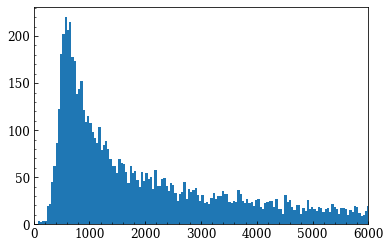

In [20]:
_ = plt.hist(x,bins=5000)
plt.xlim(0,6000)

KDE estimation with kde kernel = 100.445
KDE scores
KDE peak = 637.129 +1159.546, -396.013


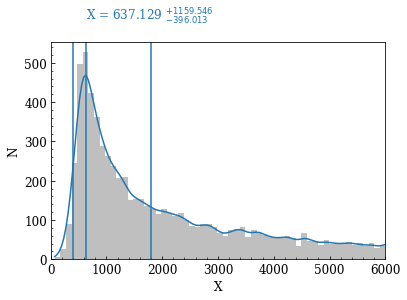

In [31]:
from importlib import reload
import fwhm_from_kde
reload(fwhm_from_kde)
from fwhm_from_kde import fwhm_from_kde

kde_peak,hwhm_peak_kde_upp,hwhm_peak_kde_low, kde_xy = fwhm_from_kde(x, #[x<6000],
                                                                     nbins=2000, n_samples=5000, show=True)

In [10]:
kde_xy[0][kde_xy[1].argmax()],kde_xy[1].max()

(598.0706806634269, 204.81433536221095)